In [24]:
import os, glob
import pandas as pd
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

In [7]:
DATA_PATH = "./Data/Scores"   # adjust to your dataset path

In [8]:
paths, labels = [], []

for shape_name in os.listdir(DATA_PATH):   # e.g. Circle, Square
    shape_path = os.path.join(DATA_PATH, shape_name)
    if not os.path.isdir(shape_path):
        continue
    for score in os.listdir(shape_path):   # e.g. 0, 1, 2
        score_path = os.path.join(shape_path, score)
        if not os.path.isdir(score_path):
            continue
        label = f"{shape_name}_{score}"
        for ext in ("*.png", "*.jpg", "*.jpeg"):
            for p in glob.glob(os.path.join(score_path, ext)):
                paths.append(p)
                labels.append(label)

In [9]:
# Create dataframe
df = pd.DataFrame({"path": paths, "label": labels})
print(df.head())
print("Total samples:", len(df))
print("Unique classes:", df['label'].nunique())

                                              path       label
0         ./Data/Scores/Triangle/0/img2302-T-0.png  Triangle_0
1         ./Data/Scores/Triangle/0/img1567-T-0.png  Triangle_0
2         ./Data/Scores/Triangle/0/img2184-T-0.png  Triangle_0
3  ./Data/Scores/Triangle/4/img4155-T-4(10111).png  Triangle_4
4  ./Data/Scores/Triangle/4/img3477-T-4(10111).png  Triangle_4
Total samples: 4297
Unique classes: 34


In [10]:
IMG_SIZE = 128

In [11]:
def load_and_preprocess(path, img_size=IMG_SIZE):
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (img_size, img_size))
    return img

In [12]:
imgs, labs = [], []

In [13]:
for p, lab in zip(df['path'], df['label']):
    img = load_and_preprocess(p)
    imgs.append(img.flatten())   # flatten into 1D vector
    labs.append(lab)

X = np.vstack(imgs) / 255.0   # normalize
y_labels = np.array(labs)

In [14]:
print("X shape:", X.shape)
print("y_labels shape:", y_labels.shape)

X shape: (4297, 16384)
y_labels shape: (4297,)


In [15]:
# Encode labels to integers
le = LabelEncoder()
y = le.fit_transform(y_labels)

In [17]:
#import collections

In [18]:
#print("Class distribution:", collections.Counter(y))

Class distribution: Counter({np.int64(21): 540, np.int64(29): 539, np.int64(7): 479, np.int64(3): 457, np.int64(33): 434, np.int64(12): 386, np.int64(25): 250, np.int64(18): 226, np.int64(17): 143, np.int64(11): 135, np.int64(2): 112, np.int64(32): 109, np.int64(24): 102, np.int64(26): 100, np.int64(6): 70, np.int64(16): 54, np.int64(20): 45, np.int64(28): 38, np.int64(22): 13, np.int64(13): 12, np.int64(10): 9, np.int64(23): 8, np.int64(15): 8, np.int64(0): 5, np.int64(31): 4, np.int64(4): 4, np.int64(27): 3, np.int64(8): 3, np.int64(30): 2, np.int64(14): 2, np.int64(5): 2, np.int64(1): 1, np.int64(19): 1, np.int64(9): 1})


In [19]:
# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [20]:
# Train SVM
clf = SVC(kernel="linear", C=1.0, class_weight="balanced")
clf.fit(X_train, y_train)

SVC(class_weight='balanced', kernel='linear')

In [23]:
# Evaluate
# Predict
y_pred = clf.predict(X_test)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}")

# Only include classes present in test set
unique_test_labels = np.unique(y_test)
print(classification_report(
    y_test,
    y_pred,
    labels=unique_test_labels,                  # labels present in y_test
    target_names=le.classes_[unique_test_labels]  # corresponding names
))

Accuracy: 0.5837
                      precision    recall  f1-score   support

            Circle_3       0.18      0.27      0.22        15
            Circle_4       0.63      0.69      0.66        91
          Diagonal_4       0.33      0.08      0.12        13
          Diagonal_5       0.52      0.79      0.63        87
 Overlapped circle_0       0.00      0.00      0.00         1
 Overlapped circle_4       0.00      0.00      0.00         1
 Overlapped circle_5       0.29      0.21      0.24        24
 Overlapped circle_6       0.60      0.77      0.68        69
Overlapped pencils_0       0.00      0.00      0.00         4
Overlapped pencils_2       0.00      0.00      0.00         1
Overlapped pencils_3       0.00      0.00      0.00         2
Overlapped pencils_4       0.00      0.00      0.00         8
Overlapped pencils_5       0.31      0.29      0.30        28
Overlapped pencils_6       0.40      0.53      0.46        32
            Square_0       0.00      0.00      0.00 

/home/mahabur-alam/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/mahabur-alam/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/mahabur-alam/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

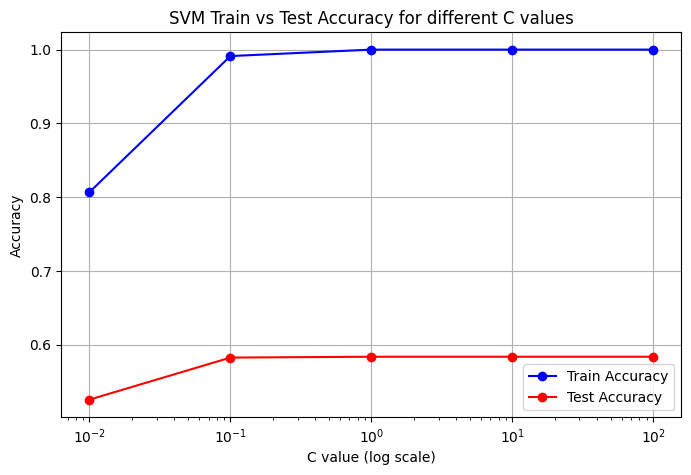

In [25]:
# Hyperparameter tuning curves
C_values = [0.01, 0.1, 1, 10, 100]
train_acc, val_acc = [], []

for C in C_values:
    clf = SVC(kernel='linear', C=C, class_weight='balanced')
    clf.fit(X_train, y_train)
    train_acc.append(clf.score(X_train, y_train))
    val_acc.append(clf.score(X_test, y_test))

plt.figure(figsize=(8,5))
plt.plot(C_values, train_acc, 'b-o', label='Train Accuracy')
plt.plot(C_values, val_acc, 'r-o', label='Test Accuracy')
plt.xscale('log')
plt.xlabel('C value (log scale)')
plt.ylabel('Accuracy')
plt.title('SVM Train vs Test Accuracy for different C values')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Learning curves
clf = SVC(kernel='linear', C=1, class_weight='balanced')
train_sizes, train_scores, test_scores = learning_curve(
    clf, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy'
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(8,5))
plt.plot(train_sizes, train_mean, 'b-o', label='Train Accuracy')
plt.plot(train_sizes, test_mean, 'r-o', label='Validation Accuracy')
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.title('SVM Learning Curve')
plt.legend()
plt.grid(True)
plt.show()